# **Advanced lane line** 
The goals / steps of this project are the following:  

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply the distortion correction to the raw image.  
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view"). 
* Detect lane pixels and fit to find lane boundary.
* Determine curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

The images for camera calibration are stored in the folder called `camera_cal`.  The images in `test_images` are for testing your pipeline on single frames.  The video called `project_video.mp4` is the video your pipeline should work well on.  `challenge_video.mp4` is an extra (and optional) challenge for you if you want to test your pipeline.

If you're feeling ambitious (totally optional though), don't stop there!  We encourage you to go out and take video of your own, calibrate your camera and show us how you would implement this project from scratch!

## Camera Calibration

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


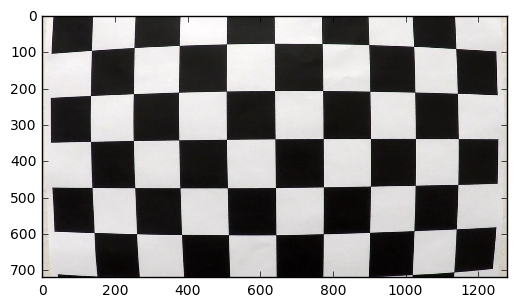

In [2]:
#reading in an image
image = mpimg.imread('camera_cal/calibration1.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray) to show a image

In [3]:
import glob

images = glob.glob('camera_cal/calibration*.jpg')

objpoints = [] #3D points in real world space
imgpoints = [] #2D points in image place

objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

## Apply the distortion correction to the raw image

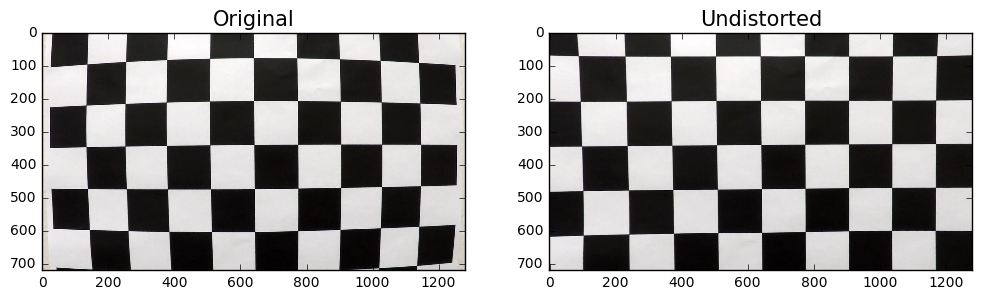

In [4]:
image = mpimg.imread('camera_cal/calibration1.jpg')
undst = cv2.undistort(image, mtx, dist, None, mtx)

f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 10))
ax1.imshow(image)
ax1.set_title('Original', fontsize=15)
ax2.imshow(undst)
ax2.set_title('Undistorted', fontsize=15)


## Perspective transform undistorted images

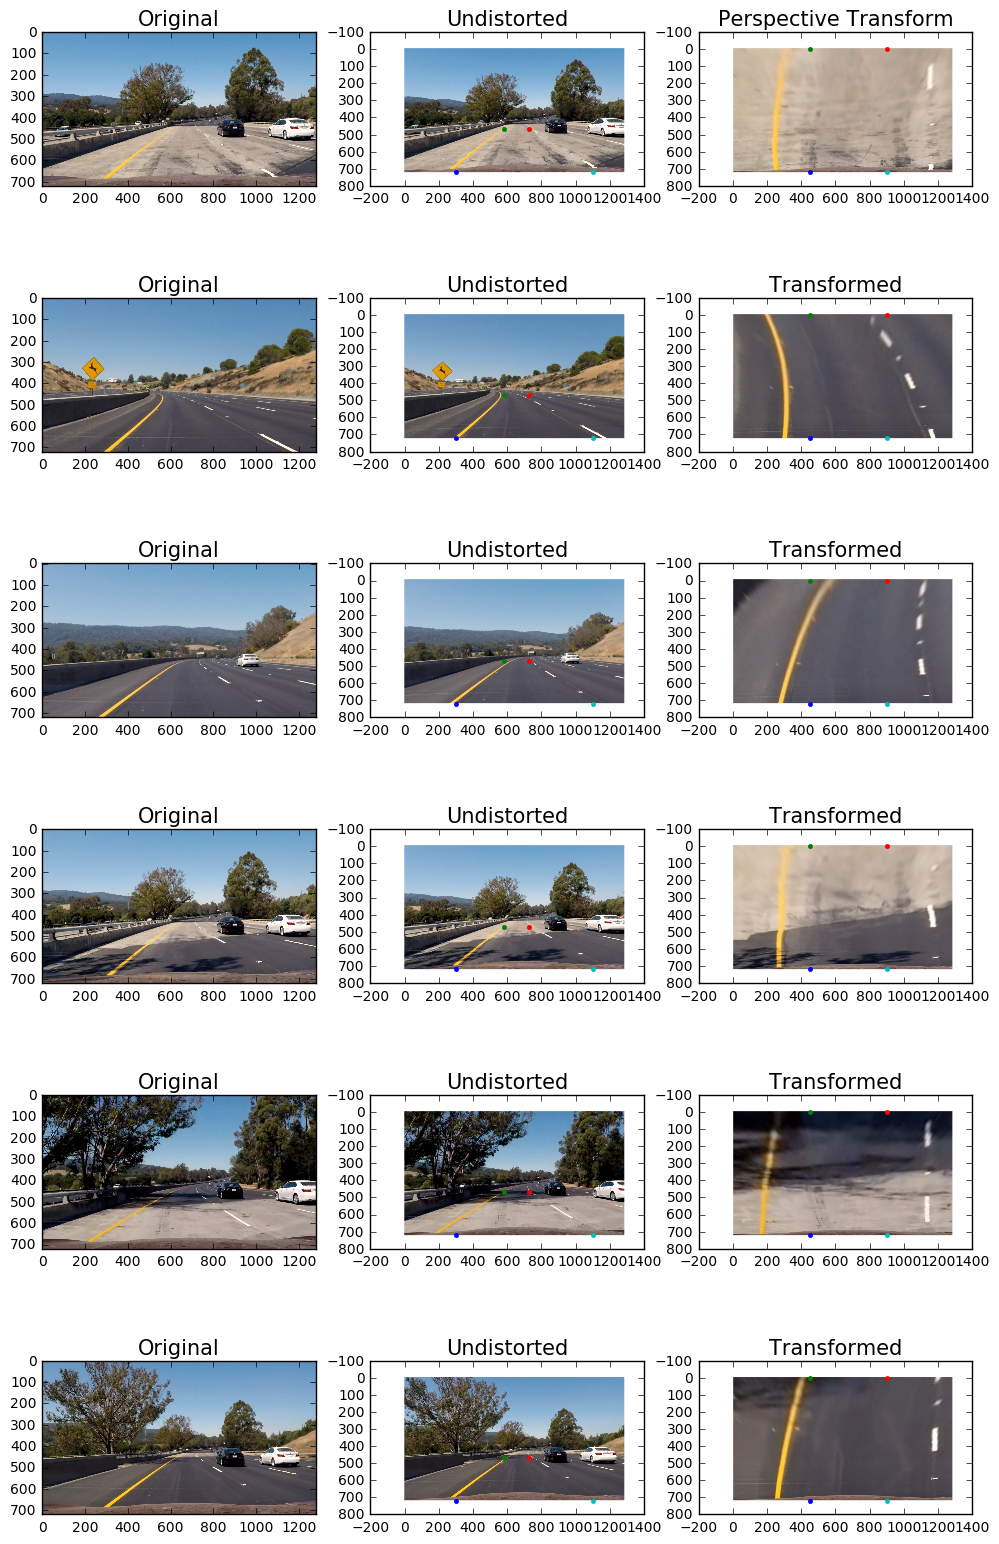

In [5]:
def perspective_transform(undist_image, src, dst, img_size):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(undist_image, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

image1 = mpimg.imread('test_images/test1.jpg')
undst1 = cv2.undistort(image1, mtx, dist, None, mtx)

src = np.float32([(300, 720),(580, 470),(730, 470),(1100, 720)])
dst = np.float32([(300, 720),(300, 0),(1100, 0),(1100, 720)])

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(6, 3, figsize=(12, 20))

#trans_image = cv2.fillConvexPoly(undst, np.array([[270,700],[1130,700],[800,500],[500,520]]), (0,255,0) )

ax1.imshow(image1)
ax1.set_title('Original', fontsize=15)

ax2.imshow(undst1)
ax2.plot(300, 720, ".")
ax2.plot(580, 470, ".")
ax2.plot(730, 470, ".")
ax2.plot(1100, 720, ".")
ax2.set_title('Undistorted', fontsize=15)

transformed1 = perspective_transform(undst1, src, dst, (image1.shape[1], image1.shape[0]))
ax3.imshow(transformed1)
ax3.plot(450, 720, ".")
ax3.plot(450, 0, ".")
ax3.plot(900, 0, ".")
ax3.plot(900, 720, ".")
ax3.set_title('Perspective Transform', fontsize=15)

image2 = mpimg.imread('test_images/test2.jpg')
ax4.imshow(image2)
ax4.set_title('Original', fontsize=15)

undst2 = cv2.undistort(image2, mtx, dist, None, mtx)
ax5.imshow(undst2)
ax5.plot(300, 720, ".")
ax5.plot(580, 470, ".")
ax5.plot(730, 470, ".")
ax5.plot(1100, 720, ".")
ax5.set_title('Undistorted', fontsize=15)

transformed2 = perspective_transform(undst2, src, dst, (image2.shape[1], image2.shape[0]))
ax6.imshow(transformed2)
ax6.plot(450, 720, ".")
ax6.plot(450, 0, ".")
ax6.plot(900, 0, ".")
ax6.plot(900, 720, ".")
ax6.set_title('Transformed', fontsize=15)

image3 = mpimg.imread('test_images/test3.jpg')
ax7.imshow(image3)
ax7.set_title('Original', fontsize=15)

undst3 = cv2.undistort(image3, mtx, dist, None, mtx)
ax8.imshow(undst3)
ax8.plot(300, 720, ".")
ax8.plot(580, 470, ".")
ax8.plot(730, 470, ".")
ax8.plot(1100, 720, ".")
ax8.set_title('Undistorted', fontsize=15)

transformed3 = perspective_transform(undst3, src, dst, (image3.shape[1], image3.shape[0]))
ax9.imshow(transformed3)
ax9.plot(450, 720, ".")
ax9.plot(450, 0, ".")
ax9.plot(900, 0, ".")
ax9.plot(900, 720, ".")
ax9.set_title('Transformed', fontsize=15)

image4 = mpimg.imread('test_images/test4.jpg')
ax10.imshow(image4)
ax10.set_title('Original', fontsize=15)

undst4 = cv2.undistort(image4, mtx, dist, None, mtx)
ax11.imshow(undst4)
ax11.plot(300, 720, ".")
ax11.plot(580, 470, ".")
ax11.plot(730, 470, ".")
ax11.plot(1100, 720, ".")
ax11.set_title('Undistorted', fontsize=15)

transformed4 = perspective_transform(undst4, src, dst, (image4.shape[1], image4.shape[0]))
ax12.imshow(transformed4)
ax12.plot(450, 720, ".")
ax12.plot(450, 0, ".")
ax12.plot(900, 0, ".")
ax12.plot(900, 720, ".")
ax12.set_title('Transformed', fontsize=15)

image5 = mpimg.imread('test_images/test5.jpg')
ax13.imshow(image5)
ax13.set_title('Original', fontsize=15)

undst5 = cv2.undistort(image5, mtx, dist, None, mtx)
ax14.imshow(undst5)
ax14.plot(300, 720, ".")
ax14.plot(580, 470, ".")
ax14.plot(730, 470, ".")
ax14.plot(1100, 720, ".")
ax14.set_title('Undistorted', fontsize=15)

transformed5 = perspective_transform(undst5, src, dst, (image5.shape[1], image5.shape[0]))
ax15.imshow(transformed5)
ax15.plot(450, 720, ".")
ax15.plot(450, 0, ".")
ax15.plot(900, 0, ".")
ax15.plot(900, 720, ".")
ax15.set_title('Transformed', fontsize=15)

image6 = mpimg.imread('test_images/test6.jpg')
ax16.imshow(image6)
ax16.set_title('Original', fontsize=15)

undst6 = cv2.undistort(image6, mtx, dist, None, mtx)
ax17.imshow(undst6)
ax17.plot(300, 720, ".")
ax17.plot(580, 470, ".")
ax17.plot(730, 470, ".")
ax17.plot(1100, 720, ".")
ax17.set_title('Undistorted', fontsize=15)

transformed6 = perspective_transform(undst6, src, dst, (image6.shape[1], image6.shape[0]))
ax18.imshow(transformed6)
ax18.plot(450, 720, ".")
ax18.plot(450, 0, ".")
ax18.plot(900, 0, ".")
ax18.plot(900, 720, ".")
ax18.set_title('Transformed', fontsize=15)

## Use color transforms, gradients, etc., to create a thresholded binary image and then do a perspective transform

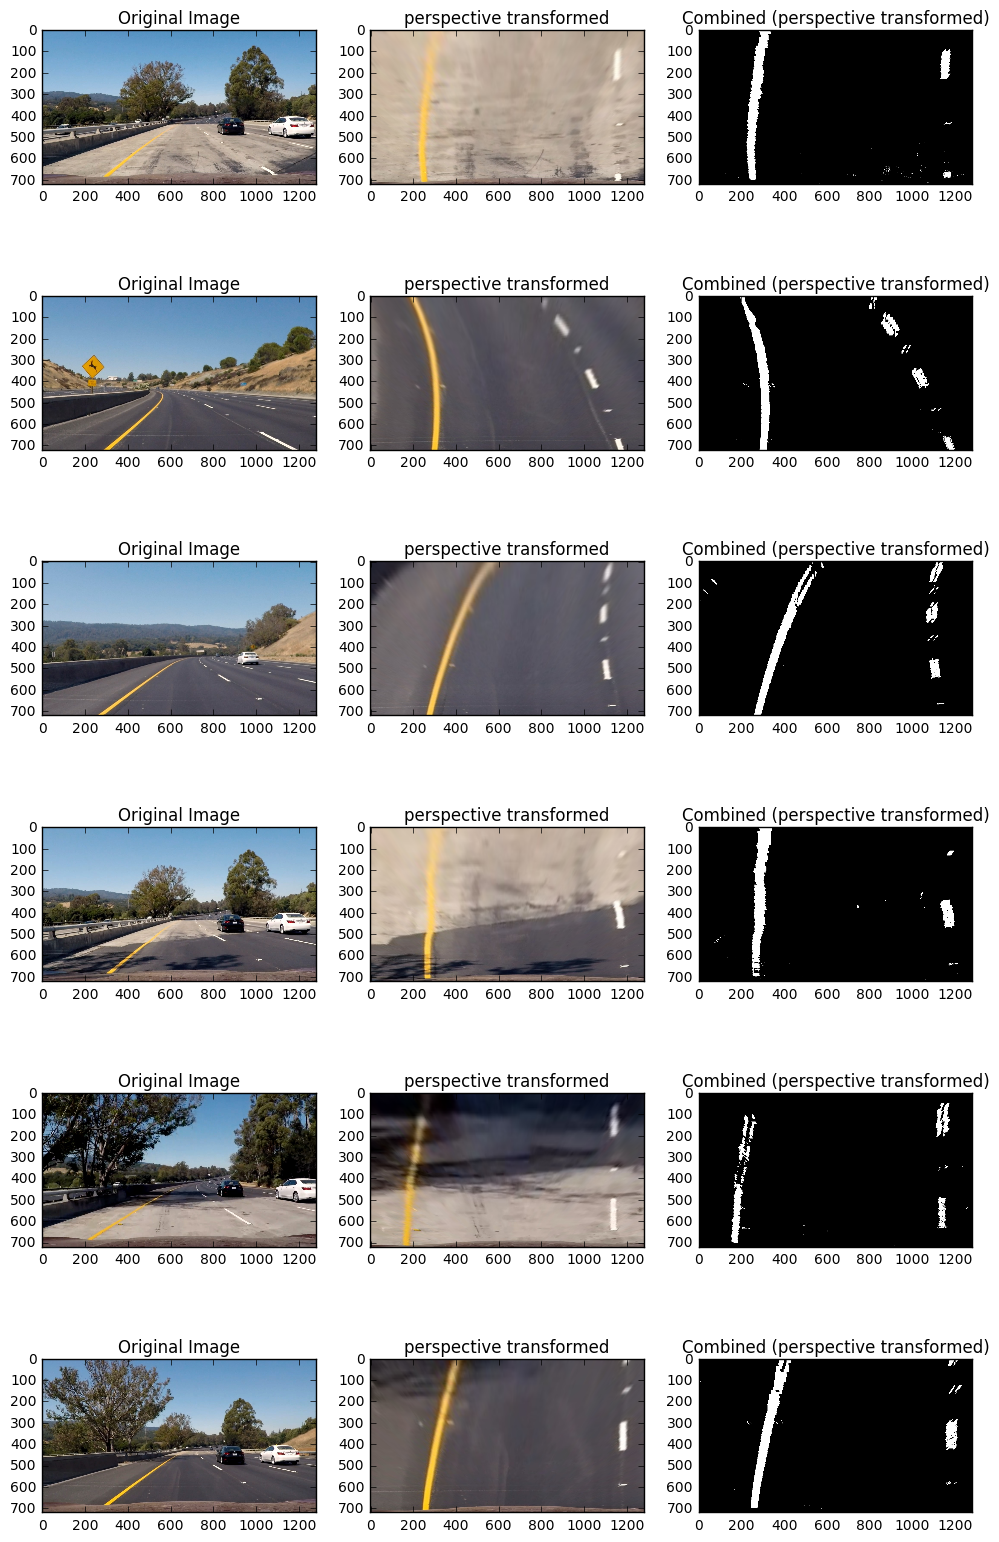

In [20]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return binary_output

def color_transform_n_threshold(img, s_thresh=(140, 255), sx_thresh=(25, 200)):
    img = np.copy(img)
    
    white_rgb = cv2.inRange(img, (200,200,200), (255,255,255))
    yellow_rgb = cv2.inRange(img, (20, 100, 100), (50, 255, 255))
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    yellow_hsv = cv2.inRange(hsv, (20, 100, 100), (50, 255, 255))
    white_hsv = cv2.inRange(hsv, (200,200,200), (255,255,255))

    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    l_ch = hls[:,:,1]
    s_ch = hls[:,:,2]
        
    #retval, s_ch_binary = cv2.threshold(s_ch.astype('uint8'), s_thresh[0], s_thresh[1], cv2.THRESH_BINARY)
    s_ch_binary = np.zeros_like(s_ch)
    #s_ch_binary[(s_ch > 150) & (s_ch <= 200)] = 1
    s_ch_binary[(l_ch > 120) & (l_ch <= 255) & 
                (s_ch > s_thresh[0]) & (s_ch <= s_thresh[1])] = 1

    yellow_hls = cv2.inRange(hls, (20, 100, 100), (50, 255, 255))
    white_hls = cv2.inRange(hls, (200,200,200), (255,255,255))

    # Sobel x
    sobelx = abs_sobel_thresh(img, 'x', sx_thresh[0], sx_thresh[1])
    
    # Sobel y
    #sobely = abs_sobel_thresh(img, 'y', 100, 200)
    sobely = abs_sobel_thresh(img, 'y', sx_thresh[0], sx_thresh[1])
    
    # Combine the filters.
    combined_sobel = cv2.bitwise_and(sobelx, sobely)
    
    bit_layer = cv2.bitwise_or(s_ch_binary, combined_sobel)
    #bit_layer = s_ch_binary | sobelx | sobely | yellow_rgb | yellow_hsv | yellow_hls | white_rgb | white_hsv | white_hls   
    #bit_layer = s_ch_binary | sobelx | sobely | yellow_hsv | yellow_rgb| white_rgb | white_hsv | white_hls 
    return s_ch_binary, bit_layer    

_, combined_b1 = color_transform_n_threshold(image1)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed1 = perspective_transform(combined_b1, src, dst, (combined_b1.shape[1], combined_b1.shape[0]))

_, combined_b2 = color_transform_n_threshold(image2)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed2 = perspective_transform(combined_b2, src, dst, (combined_b2.shape[1], combined_b2.shape[0]))

_, combined_b3 = color_transform_n_threshold(image3)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed3 = perspective_transform(combined_b3, src, dst, (combined_b3.shape[1], combined_b3.shape[0]))

_, combined_b4 = color_transform_n_threshold(image4)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed4 = perspective_transform(combined_b4, src, dst, (combined_b4.shape[1], combined_b4.shape[0]))

_, combined_b5 = color_transform_n_threshold(image5)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed5 = perspective_transform(combined_b5, src, dst, (combined_b5.shape[1], combined_b5.shape[0]))

_, combined_b6 = color_transform_n_threshold(image6)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed6 = perspective_transform(combined_b6, src, dst, (combined_b6.shape[1], combined_b6.shape[0]))

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(6, 3, figsize=(12, 20))

ax1.set_title('Original Image')
ax1.imshow(image1)
ax2.set_title('perspective transformed')
ax2.imshow(transformed1)
ax3.set_title('Combined (perspective transformed)')
ax3.imshow(combined_b_transformed1, cmap='gray')

ax4.set_title('Original Image')
ax4.imshow(image2)
ax5.set_title('perspective transformed')
ax5.imshow(transformed2)
ax6.set_title('Combined (perspective transformed)')
ax6.imshow(combined_b_transformed2, cmap='gray')

ax7.set_title('Original Image')
ax7.imshow(image3)
ax8.set_title('perspective transformed')
ax8.imshow(transformed3)
ax9.set_title('Combined (perspective transformed)')
ax9.imshow(combined_b_transformed3, cmap='gray')

ax10.set_title('Original Image')
ax10.imshow(image4)
ax11.set_title('perspective transformed')
ax11.imshow(transformed4)
ax12.set_title('Combined (perspective transformed)')
ax12.imshow(combined_b_transformed4, cmap='gray')

ax13.set_title('Original Image')
ax13.imshow(image5)
ax14.set_title('perspective transformed')
ax14.imshow(transformed5)
ax15.set_title('Combined (perspective transformed)')
ax15.imshow(combined_b_transformed5, cmap='gray')

ax16.set_title('Original Image')
ax16.imshow(image6)
ax17.set_title('perspective transformed')
ax17.imshow(transformed6)
ax18.set_title('Combined (perspective transformed)')
ax18.imshow(combined_b_transformed6, cmap='gray')


## Detect lane pixels and fit to find lane boundary.

=====test_image1======
=====test_image2======
=====test_image3======
=====test_image4======
=====test_image5======
=====test_image6======


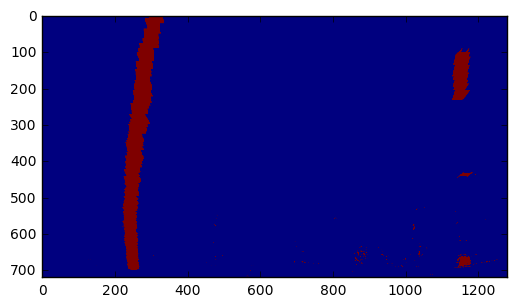

In [21]:
import scipy.signal

def fit_polynomial(xcord_left_line, ycord_left_line, xcord_right_line, ycord_right_line):
      # Fit a second order polynomial to each lane line
    left_fit = np.polyfit(ycord_left_line, xcord_left_line, 2)
    left_fitx = left_fit[0] * ycord_left_line ** 2 + left_fit[1] * ycord_left_line + left_fit[2]

    right_fit = np.polyfit(ycord_right_line, xcord_right_line, 2)
    right_fitx = right_fit[0] * ycord_right_line ** 2 + right_fit[1] * ycord_right_line + right_fit[2]

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meteres per pixel in x dimension
    y_eval_left = np.max(ycord_left_line)
    y_eval_right = np.max(ycord_right_line)
    
    left_fit_cr = np.polyfit(ycord_left_line*ym_per_pix, xcord_left_line*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ycord_right_line*ym_per_pix, xcord_right_line*xm_per_pix, 2) 
    
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval_left + left_fit_cr[1])**2)**1.5) \
                             /np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval_right + right_fit_cr[1])**2)**1.5) \
                                /np.absolute(2*right_fit_cr[0])
        
    return left_fit, left_fitx, right_fit, right_fitx, left_curverad, right_curverad
    

def get_line(combined_b_trans_img):
    xcord_left_line = []
    ycord_left_line = []
    xcord_right_line = []
    ycord_right_line = []

    histogram = np.sum(combined_b_trans_img[combined_b_trans_img.shape[0]*0.6:,:], axis=0)
    midpoint = np.int(histogram.shape[0]/2)
#     print("starting mid point - {}".format(midpoint))
        
    starting_left_point = np.argmax(histogram[0:midpoint])
    starting_right_point = np.argmax(histogram[midpoint:])+midpoint
#     print("starting left point - {}".format(starting_left_point))
#     print("starting right point - {}".format(starting_right_point))    
    left_peak = starting_left_point
    right_peak = starting_right_point
    previous_left_peak = starting_left_point
    previous_right_peak = starting_right_point
    
    left_peak_found = 0
    found_left_peak_value = starting_left_point
    right_peak_found = 0
    found_right_peak_value = starting_right_point
    middle_px_left_lane = starting_left_point
    middle_px_right_lane = starting_right_point

    for i in reversed(range(0, 100)):
        start_row = i * combined_b_trans_img.shape[0]//100
        end_row = (i + 1) * combined_b_trans_img.shape[0]//100
        start_col = previous_left_peak - 50
        if start_col < 0:
            start_col = 0
        end_col = previous_left_peak + 50

#         print("looking in left location")
#         print(start_col, end_col)
        scan_line = combined_b_trans_img[start_row:end_row,start_col:end_col]
        ones = np.where(scan_line == 1)
#         print(ones)
        if len(ones[0]):
#             print("potential left")
#             print(np.mean(ones)+start_col)
            previous_left_peak = np.int(np.mean(ones)+start_col+20)
            left_peak = np.int(np.mean(ones)+start_col+20)
        
#         print("left pixels")
#         print(left_peak)
        if (i == 50):
            middle_px_left_lane = left_peak        

        xcord_left_line.append(left_peak)
        ycord_left_line.append(int(i * combined_b_trans_img.shape[0] // 100))

    for i in reversed(range(0, 100)):
        start_row = i * combined_b_trans_img.shape[0]//100
        end_row = (i + 1) * combined_b_trans_img.shape[0]//100
        start_col = previous_right_peak - 50
        end_col = previous_right_peak + 50

#         print("looking in right location")
#         print(start_col, end_col)  
        scan_line = combined_b_trans_img[start_row:end_row,start_col:end_col]
        ones = np.where(scan_line == 1)
#         print(ones)
        if len(ones[0]):
#             print("potential right")
#             print(np.mean(ones)+start_col)
            previous_right_peak = np.int(np.mean(ones)+start_col+20)
            right_peak = np.int(np.mean(ones)+start_col+20)
            
#         print("right pixels")
#         print(right_peak)
        if (i == 50):
            middle_px_right_lane = right_peak        
        xcord_right_line.append(right_peak)
        ycord_right_line.append(int(i * combined_b_trans_img.shape[0] // 100))
        
    ycord_left_line = np.array(ycord_left_line)
    xcord_left_line = np.array(xcord_left_line)
    
#     print("left line")
#     print(xcord_left_line)
#     print(ycord_left_line)
    
    ycord_right_line = np.array(ycord_right_line)
    xcord_right_line = np.array(xcord_right_line)

#     print("right line")
#     print(xcord_right_line)
#     print(ycord_right_line)
        
    lane_middle = int((middle_px_right_lane - middle_px_left_lane)/2.)+middle_px_left_lane        
    return xcord_left_line, ycord_left_line, xcord_right_line, ycord_right_line, lane_middle

print("=====test_image1======")    
xcord_left_line1, ycord_left_line1, xcord_right_line1, ycord_right_line1, lane_middle1 = get_line(combined_b_transformed1)
left_fit1, left_fitx1, right_fit1, right_fitx1, left_curverad1, right_curverad1 = fit_polynomial(xcord_left_line1, ycord_left_line1, xcord_right_line1, ycord_right_line1)
print("=====test_image2======")    
xcord_left_line2, ycord_left_line2, xcord_right_line2, ycord_right_line2, lane_middle2 = get_line(combined_b_transformed2)
left_fit2, left_fitx2, right_fit2, right_fitx2, left_curverad2, right_curverad2 = fit_polynomial(xcord_left_line2, ycord_left_line2, xcord_right_line2, ycord_right_line2)
print("=====test_image3======")     
xcord_left_line3, ycord_left_line3, xcord_right_line3, ycord_right_line3, lane_middle3 = get_line(combined_b_transformed3)
left_fit3, left_fitx3, right_fit3, right_fitx3, left_curverad3, right_curverad3 = fit_polynomial(xcord_left_line3, ycord_left_line3, xcord_right_line3, ycord_right_line3)
print("=====test_image4======")    
xcord_left_line4, ycord_left_line4, xcord_right_line4, ycord_right_line4, lane_middle4 = get_line(combined_b_transformed4)
left_fit4, left_fitx4, right_fit4, right_fitx4, left_curverad4, right_curverad4 = fit_polynomial(xcord_left_line4, ycord_left_line4, xcord_right_line4, ycord_right_line4)
print("=====test_image5======")    
xcord_left_line5, ycord_left_line5, xcord_right_line5, ycord_right_line5, lane_middle5 = get_line(combined_b_transformed5)
left_fit5, left_fitx5, right_fit5, right_fitx5, left_curverad5, right_curverad5 = fit_polynomial(xcord_left_line5, ycord_left_line5, xcord_right_line5, ycord_right_line5)
print("=====test_image6======")    
xcord_left_line6, ycord_left_line6, xcord_right_line6, ycord_right_line6, lane_middle6 = get_line(combined_b_transformed6)
left_fit6, left_fitx6, right_fit6, right_fitx6, left_curverad6, right_curverad6 = fit_polynomial(xcord_left_line6, ycord_left_line6, xcord_right_line6, ycord_right_line6)

plt.imshow(combined_b_transformed1)

## Warp the detected lane boundaries back onto the original image.

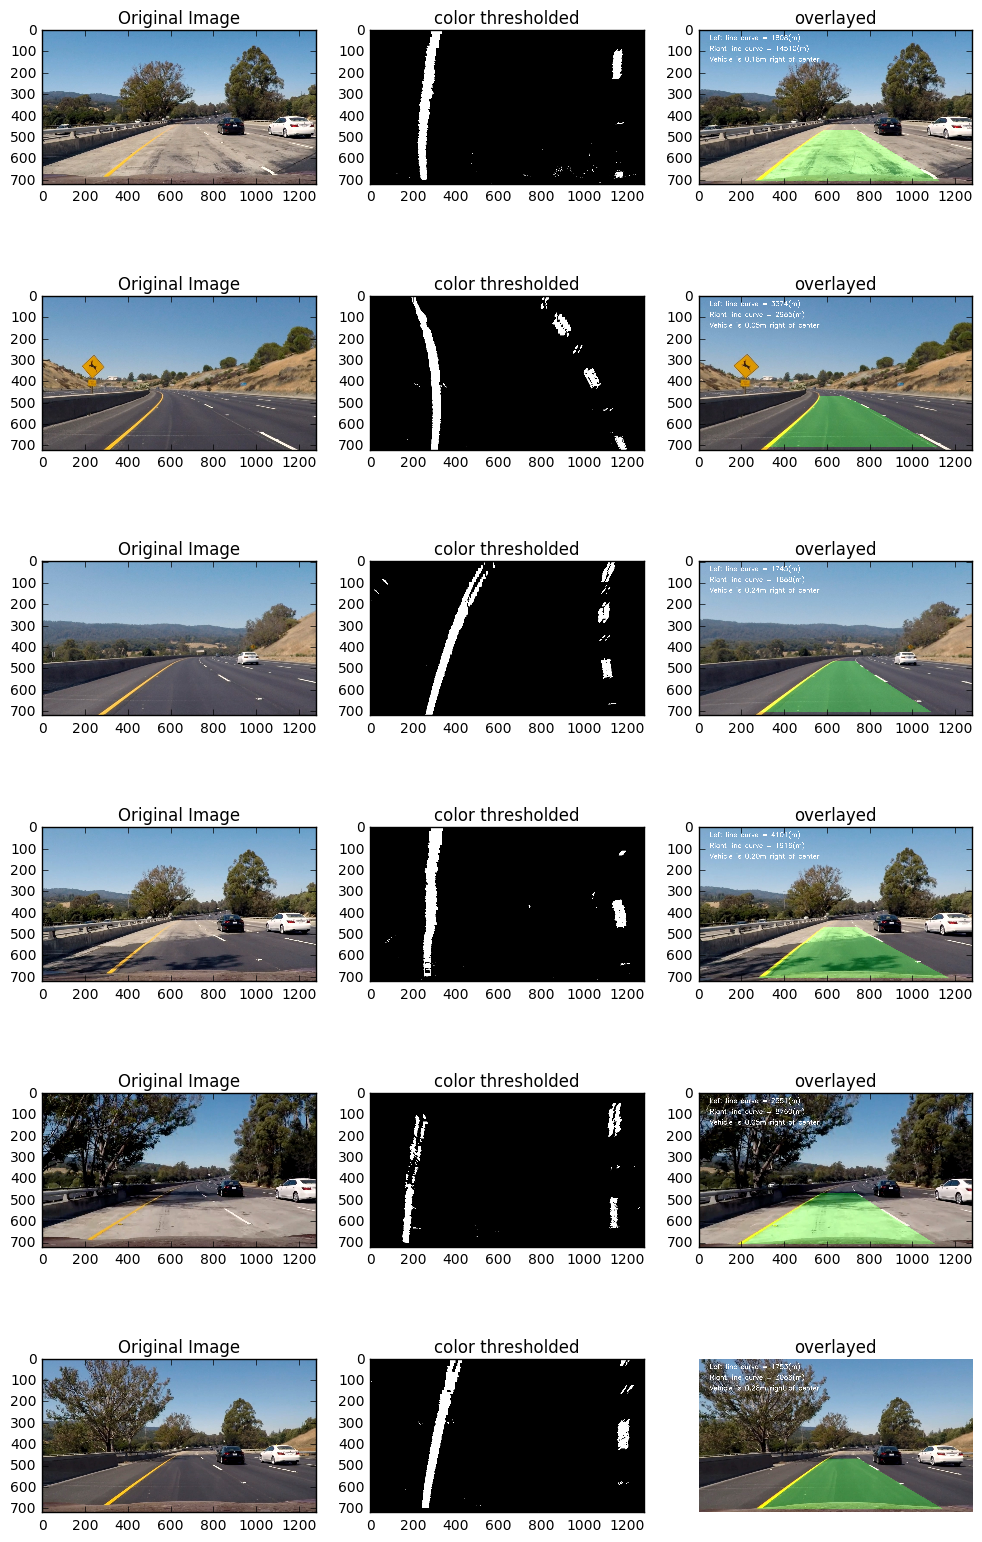

In [22]:
def add_info(result, left_curverad, right_curverad, lane_middle):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(result, 'Left line curve = %d(m)' % left_curverad, (50,50), font, 1,(255,255,255),2)
    cv2.putText(result, 'Right line curve = %d(m)' % right_curverad, (50,100), font, 1,(255,255,255),2)
    if (lane_middle-640 > 0):
        offset = ((lane_middle-640)/640.*(3.66/2.))
        left_or_right = "right"
    else:
        offset = ((lane_middle-640)/640.*(3.66/2.))*-1
        left_or_right = "left"
    left_or_right = 'left' if offset < 0 else 'right'
    cv2.putText(result, 'Vehicle is %.2fm %s of center' % (np.abs(offset), left_or_right), (50,150), font, 1,(255,255,255),2)
    return result

def drawlines(transformed, left_fitx, ycord_left_line, right_fitx, ycord_right_line, src, dst, image, undst):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(transformed).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ycord_left_line]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ycord_right_line])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = perspective_transform(color_warp, dst, src , (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undst, 1, newwarp, 0.3, 0)
    
    return result

# f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12, 20))
# plt.axis('off')

# ax1.set_title('Original Image')
# ax1.imshow(image1)
# ax2.set_title('color thresholded')
# ax2.imshow(combined_b_transformed1, cmap='gray')
# ax3.set_title('overlayed')
# ax3.imshow(r1, cmap='gray')


r1 = drawlines(combined_b_transformed1, left_fitx1, ycord_left_line1, right_fitx1, ycord_right_line1, src, dst, image1, undst1)
r1 = add_info(r1, left_curverad1, right_curverad1, lane_middle1)

r2 = drawlines(combined_b_transformed2, left_fitx2, ycord_left_line2, right_fitx2, ycord_right_line2, src, dst, image2, undst2)
r2 = add_info(r2, left_curverad2, right_curverad2, lane_middle2)

r3 = drawlines(combined_b_transformed3, left_fitx3, ycord_left_line3, right_fitx3, ycord_right_line3, src, dst, image3, undst3)
r3 = add_info(r3, left_curverad3, right_curverad3, lane_middle3)

r4 = drawlines(combined_b_transformed4, left_fitx4, ycord_left_line4, right_fitx4, ycord_right_line4, src, dst, image4, undst4)
r4 = add_info(r4, left_curverad4, right_curverad4, lane_middle4)

r5 = drawlines(combined_b_transformed5, left_fitx5, ycord_left_line5, right_fitx5, ycord_right_line5, src, dst, image5, undst5)
r5 = add_info(r5, left_curverad5, right_curverad5, lane_middle5)

r6 = drawlines(combined_b_transformed6, left_fitx6, ycord_left_line6, right_fitx6, ycord_right_line6, src, dst, image6, undst6)
r6 = add_info(r6, left_curverad6, right_curverad6, lane_middle6)

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(6, 3, figsize=(12, 20))
plt.axis('off')

ax1.set_title('Original Image')
ax1.imshow(image1)
ax2.set_title('color thresholded')
ax2.imshow(combined_b_transformed1, cmap='gray')
ax3.set_title('overlayed')
ax3.imshow(r1, cmap='gray')

ax4.set_title('Original Image')
ax4.imshow(image2)
ax5.set_title('color thresholded')
ax5.imshow(combined_b_transformed2, cmap='gray')
ax6.set_title('overlayed')
ax6.imshow(r2, cmap='gray')

ax7.set_title('Original Image')
ax7.imshow(image3)
ax8.set_title('color thresholded')
ax8.imshow(combined_b_transformed3, cmap='gray')
ax9.set_title('overlayed')
ax9.imshow(r3, cmap='gray')

ax10.set_title('Original Image')
ax10.imshow(image4)
ax11.set_title('color thresholded')
ax11.imshow(combined_b_transformed4, cmap='gray')
ax12.set_title('overlayed')
ax12.imshow(r4, cmap='gray')

ax13.set_title('Original Image')
ax13.imshow(image5)
ax14.set_title('color thresholded')
ax14.imshow(combined_b_transformed5, cmap='gray')
ax15.set_title('overlayed')
ax15.imshow(r5, cmap='gray')

ax16.set_title('Original Image')
ax16.imshow(image6)
ax17.set_title('color thresholded')
ax17.imshow(combined_b_transformed6, cmap='gray')
ax18.set_title('overlayed')
ax18.imshow(r6, cmap='gray')

## Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [23]:
from moviepy.editor import VideoFileClip

NUM_OF_FRAMES = 5
COUNTER = 0    

class Frame:
    def __init__(self):
        self.frame_count = 0
        self.left_curvature = 0
        self.right_curvature = 0
        self.middle = 0
        
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        #was the line detected in the last iteration?
        self.detected = False
        #polynomial coefficients for the last n iterations
        self.previous_fits = []  
        #polynomial coefficients for the most recent fit
        self.current_fit = None  
        #curvature for the last n iterations
        self.previous_radius_of_curvatures = []
        #radius of curvature of the line in meters
        self.radius_of_curvature = None 
                
    def check_reset(self, x):
        if (len(x) < 100):
            self.detected = False
            self.frames_skipped = 0
            self.previous_fits = []
            self.previous_radius_of_curvatures = []
        
def pipeline(image, left_line, right_line, frame):
    undst = cv2.undistort(image, mtx, dist, None, mtx)
    
    s_b, combined_b = color_transform_n_threshold(image)
    #s_b_transformed = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
    combined_b_transformed = perspective_transform(combined_b, src, dst, (combined_b.shape[1], combined_b.shape[0]))

    xcord_left_line, ycord_left_line, xcord_right_line, ycord_right_line, lane_middle = get_line(combined_b_transformed)
    left_fit, left_fitx, right_fit, right_fitx, left_curverad, right_curverad = fit_polynomial(xcord_left_line, ycord_left_line, xcord_right_line, ycord_right_line)
    
    left_line.check_reset(xcord_left_line)
    left_line.previous_fits.append(left_fitx)
    left_line.previous_fits = left_line.previous_fits[-NUM_OF_FRAMES:]
    left_fitx = np.average(left_line.previous_fits, axis=0)

    left_line.previous_radius_of_curvatures.append(left_curverad)
    left_line.previous_radius_of_curvatures = left_line.previous_radius_of_curvatures[-NUM_OF_FRAMES:]
    left_curverad = np.average(left_line.previous_radius_of_curvatures, axis=0)
    
    left_line.current_fit = left_fitx
    left_line.radius_of_curvature = left_curverad

    right_line.check_reset(xcord_right_line)
    right_line.previous_fits.append(right_fitx)
    right_line.previous_fits = right_line.previous_fits[-NUM_OF_FRAMES:]
    right_fitx = np.average(right_line.previous_fits, axis=0)

    right_line.previous_radius_of_curvatures.append(right_curverad)
    right_line.previous_radius_of_curvatures = right_line.previous_radius_of_curvatures[-NUM_OF_FRAMES:]
    right_curverad = np.average(right_line.previous_radius_of_curvatures, axis=0)

    right_line.current_fit = right_fitx
    right_line.radius_of_curvature = right_curverad

    # Periodically update the curvature and lane_middle.
    if frame.frame_count % 5 == 0:
        frame.left_curvature = int(left_line.radius_of_curvature)
        frame.right_curvature = int(right_line.radius_of_curvature)
        frame.middle = lane_middle

    frame.frame_count += 1
    
    r = drawlines(combined_b_transformed, left_fitx, ycord_left_line, right_fitx, ycord_right_line, src, dst, image, undst)        
    r = add_info(r, frame.left_curvature, frame.right_curvature, frame.middle)
    return r

def process_image():
    left_line = Line()
    right_line = Line()
    frame = Frame()
    return (lambda img: pipeline(img, left_line, right_line, frame))

clip1 = VideoFileClip("project_video.mp4")
project_clip = clip1.fl_image(process_image())

%time project_clip.write_videofile('project_video_updated.mp4', audio=False)



[MoviePy] >>>> Building video project_video_updated.mp4
[MoviePy] Writing video project_video_updated.mp4


100%|█████████▉| 1260/1261 [02:36<00:00,  7.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_updated.mp4 

CPU times: user 9min 54s, sys: 1min 7s, total: 11min 1s
Wall time: 2min 37s
